**<h1>Diagnóstico Precoce de Doenças Cardiovasculares</h1>**


    O conjunto de dados consiste em 70.000 registros de dados de pacientes, 11 recursos + id's

Características (Features):

    Idade | int (dias)
    Gênero | 1 - mulheres, 2 - homens
    Altura | int (cm) 
    Peso | flutuador (kg) 
    Pressão arterial sistólica | Recurso de exame |  int |
    Pressão arterial diastólica | Recurso de exame | int |
    Colesterol | Recurso de exame | 1: normal, 2: acima do normal, 3: muito acima do normal |
    Glicose | Recurso de exame | 1: normal, 2: acima do normal, 3: muito acima do normal |
    Fumar | binário |
    Ingestão de álcool | binário |
    Atividade física | binário |
    Presença ou ausência de doença cardiovascular | binário 

fonte: https://sejaumdatascientist.com/projeto-de-data-science-diagnostico-precoce-de-doencas-cardiovasculares/

# Importações das Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Importação da base de dados

In [ ]:
dados = pd.read_csv("cardio_train.csv", sep = ";")
dados.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Exploração da base de dados

In [ ]:
# Renomeando as colunas

dados = dados.rename(columns = {
    'age': 'idade_dias',
    'gender': 'genero',
    'height': 'altura',
    'weight': 'peso',
    'ap_hi': 'p_sistolica',
    'ap_lo': 'p_diastolica',
    'cholesterol': 'colesterol',
    'gluc': 'glicose',
    'smoke': 'fumante',
    'alco': 'ingestao_de_alcool',
    'Physical activity': 'atividade_fisica',
    'cardio': 'doença_cardiovascular'
})

In [ ]:
dados.shape

(70000, 13)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     70000 non-null  int64  
 1   idade_dias             70000 non-null  int64  
 2   genero                 70000 non-null  int64  
 3   altura                 70000 non-null  int64  
 4   peso                   70000 non-null  float64
 5   p_sistolica            70000 non-null  int64  
 6   p_diastolica           70000 non-null  int64  
 7   colesterol             70000 non-null  int64  
 8   glicose                70000 non-null  int64  
 9   fumante                70000 non-null  int64  
 10  ingestao_de_alcool     70000 non-null  int64  
 11  active                 70000 non-null  int64  
 12  doença_cardiovascular  70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Verificando se existem dados duplicados

print("Valores duplicados:{} ".format(dados.duplicated().sum()))

Valores duplicados:24 


In [ ]:
# Excluindo os dados duplicados

dados.drop_duplicates(inplace=True)

In [ ]:
# Verificando se os dados foram excluidos

print("Valores duplicados:{} ".format(dados.duplicated().sum()))

Valores duplicados:0 


In [ ]:
# Transformar a idade de dias para idade em anos.

age = dados['idade_dias']
list_age_years = []

for item in age:
  list_age_years.append(int(item / 365)) # Arredondando para inteiro
list_age_years

dados['idade_anos'] = list_age_years
dados

,idade_dias,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,ingestao_de_alcool,active,doença_cardiovascular,idade_anos
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52


In [ ]:
# Transformando a coluna id em index.

dados = dados.set_index('id')

In [ ]:
dados.head()

,idade_dias,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,ingestao_de_alcool,active,doença_cardiovascular,idade_anos
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [ ]:
dados.corr()

,idade_dias,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,ingestao_de_alcool,active,doença_cardiovascular,idade_anos
idade_dias,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999091
genero,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.022913
altura,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081506
peso,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053561
p_sistolica,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020854
p_diastolica,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017620
colesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154012
glicose,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098388
fumante,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047649
ingestao_de_alcool,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029756


# Análise da Qualidade dos dados

In [ ]:
# Quantidade de pessoas com presença de doença cardiovascular e sem doença cardiovascular

dados['doença_cardiovascular'].value_counts()

0    35021
1    34979
Name: doença_cardiovascular, dtype: int64

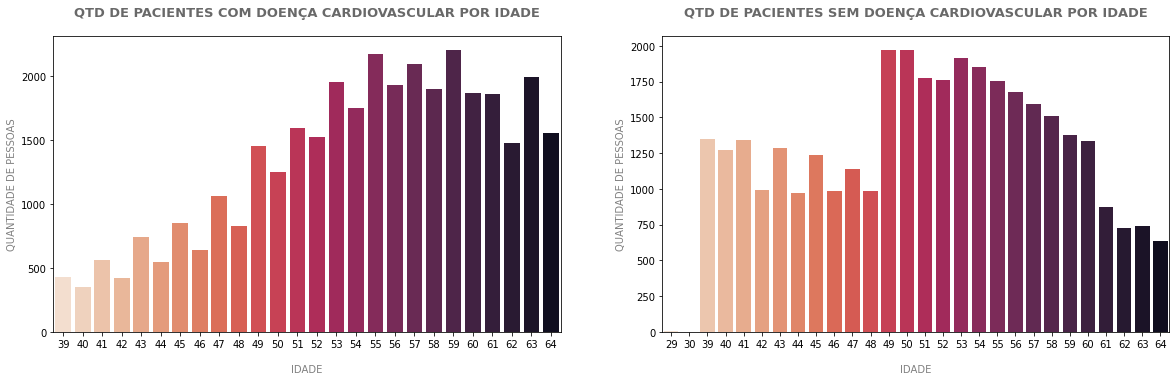

In [ ]:
dados_cardio = dados.query('doença_cardiovascular == 1')['idade_anos']

plt.figure(figsize=(20, 25))
ax0 = plt.subplot(4, 2, 1)
ax0 = sns.countplot(dados_cardio ,data = dados_cardio, dodge = False, palette='rocket_r')
ax0 = plt.title('QTD DE PACIENTES COM DOENÇA CARDIOVASCULAR POR IDADE', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax0 = plt.xlabel('IDADE', color = 'grey', labelpad = 15, fontsize = 10)
ax0 = plt.ylabel('QUANTIDADE DE PESSOAS', color = 'grey', fontsize = 10)


dados_nao_cardio = dados.query('doença_cardiovascular == 0')['idade_anos']

ax0 = plt.subplot(4, 2, 2)
ax0 = sns.countplot(dados_nao_cardio, data = dados_nao_cardio, dodge = False, palette='rocket_r')
ax0 = plt.title('QTD DE PACIENTES SEM DOENÇA CARDIOVASCULAR POR IDADE', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax0 = plt.xlabel('IDADE', color = 'grey', labelpad = 15, fontsize = 10)
ax0 = plt.ylabel('QUANTIDADE DE PESSOAS', color = 'grey', fontsize = 10)


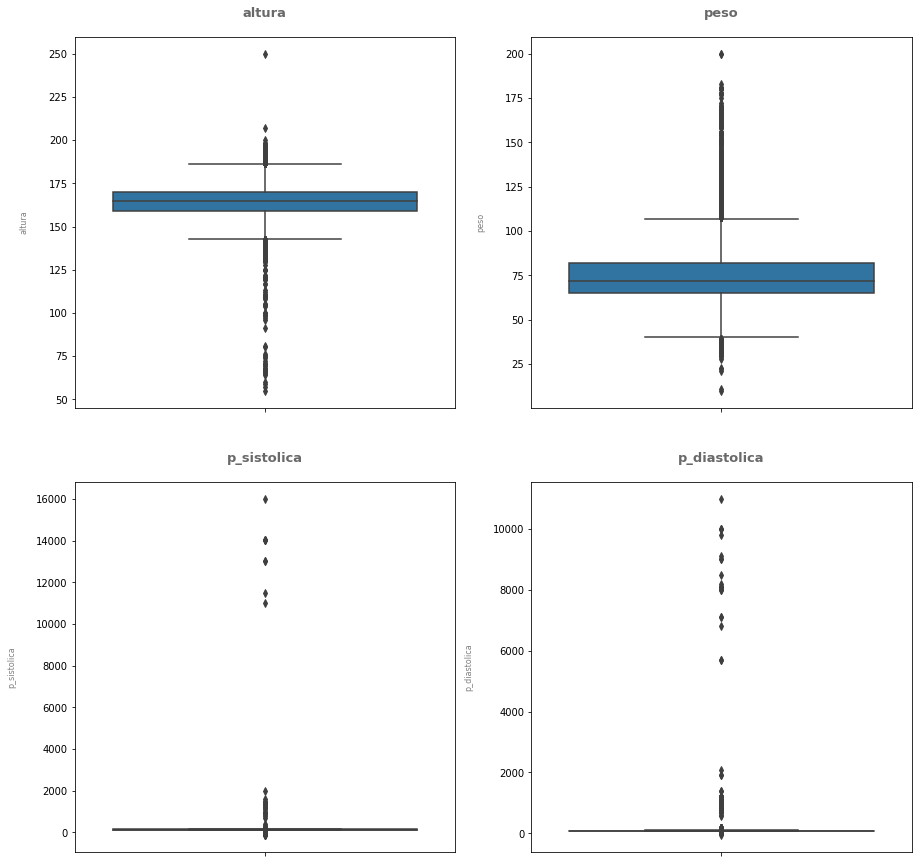

In [ ]:
# Observando os Outliers 

plt.figure(figsize=(15, 15))

def plotar_boxplot(posicao, caracteristica):

  ax2 = plt.subplot(2, 2, posicao)
  ax2 = sns.boxplot(y = dados[caracteristica],  data = dados, hue = caracteristica)
  ax2 = plt.title(caracteristica, pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
  ax2 = plt.xlabel('', fontsize=0)
  ax2 = plt.ylabel(caracteristica, color = 'grey', labelpad = 20, fontsize = 8)


plotar_boxplot(1, 'altura')
plotar_boxplot(2, 'peso')
plotar_boxplot(3, 'p_sistolica')
plotar_boxplot(4, 'p_diastolica')

    Existem valores das variaveis p_sistolica e p_diastolica que estão bem acima de acordo com a tabela de pressão arterial abaixo.
    

**<h1>Tabela de Pressão arterial</h1>**

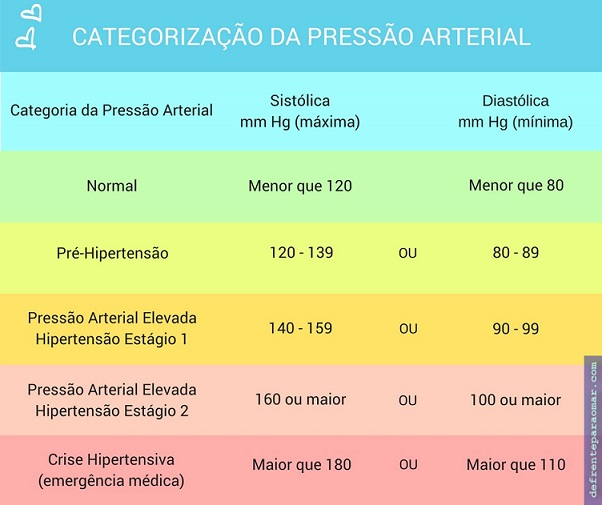



In [ ]:
# Tentando entender os Outliers 

dados.query('p_sistolica > 250 or p_sistolica < 30')['p_sistolica'].value_counts()

 12       76
 14       29
 11       28
 13       15
 15       12
 10        7
 906       6
 14020     4
 20        4
 17        3
 16        3
 1400      3
 907       3
-100       2
-120       2
 1300      2
 1         2
 1420      2
 13010     2
 11020     1
 1620      1
 24        1
 806       1
 7         1
 309       1
 11500     1
 1110      1
 1130      1
 1500      1
 1409      1
 902       1
 909       1
 401       1
 16020     1
-150       1
 1202      1
 1205      1
 701       1
 960       1
 2000      1
-140       1
-115       1
Name: p_sistolica, dtype: int64

In [ ]:
dados.query('p_diastolica < 30 or p_diastolica > 200')['p_diastolica'].value_counts()

1000    666
1100    156
0        21
1200     21
20       15
       ... 
1211      1
901       1
9100      1
810       1
1022      1
Name: p_diastolica, Length: 72, dtype: int64

In [ ]:
outliers  = ((dados["p_sistolica"]>250) | (dados["p_sistolica"]<30) | (dados["p_diastolica"]>200) | (dados["p_diastolica"]<30) )
print("Existem {} valores fora do padrão (outlier)".format(dados[outliers]["doença_cardiovascular"].count()))

Existem 1219 valores fora do padrão (outlier)


     De acordo com a tabela acima foi definido alguns intervalos para diminuir o número de outliers no dataset. 

In [ ]:
# Removendo os dados fora do padrão.

dados = dados[~outliers]

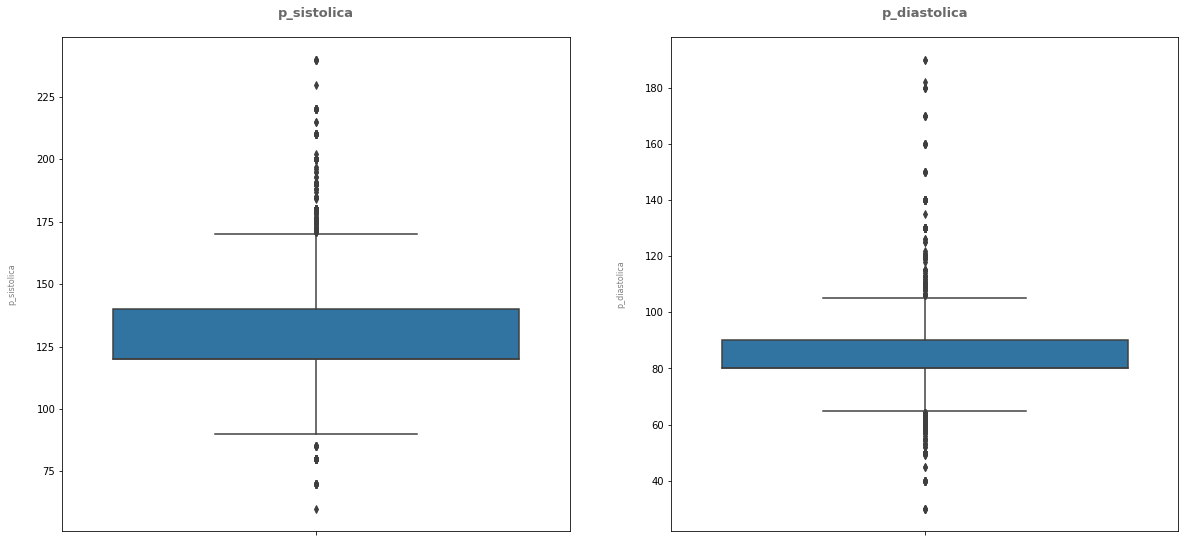

In [ ]:
plt.figure(figsize=(20,20))
plotar_boxplot(1, 'p_sistolica')
plotar_boxplot(2, 'p_diastolica')

In [ ]:
dados.corr()

,idade_dias,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,ingestao_de_alcool,active,doença_cardiovascular,idade_anos
idade_dias,1.000000,-0.023198,-0.081470,0.054631,0.208490,0.152463,0.155457,0.099079,-0.047898,-0.029053,-0.010427,0.239504,0.999092
genero,-0.023198,1.000000,0.499381,0.155955,0.061248,0.066498,-0.036675,-0.021157,0.338795,0.171098,0.005851,0.007214,-0.023330
altura,-0.081470,0.499381,1.000000,0.291819,0.018404,0.035213,-0.050594,-0.018755,0.188299,0.094792,-0.007422,-0.010799,-0.081448
peso,0.054631,0.155955,0.291819,1.000000,0.269178,0.248620,0.141053,0.106905,0.066935,0.068016,-0.017742,0.179692,0.054495
p_sistolica,0.208490,0.061248,0.018404,0.269178,1.000000,0.696945,0.193993,0.092570,0.027034,0.032488,-0.001311,0.425080,0.208119
p_diastolica,0.152463,0.066498,0.035213,0.248620,0.696945,1.000000,0.158534,0.076343,0.024804,0.043590,0.000242,0.334639,0.152253
colesterol,0.155457,-0.036675,-0.050594,0.141053,0.193993,0.158534,1.000000,0.451265,0.009851,0.035693,0.009025,0.221501,0.155067
glicose,0.099079,-0.021157,-0.018755,0.106905,0.092570,0.076343,0.451265,1.000000,-0.005736,0.011205,-0.007462,0.090101,0.098768
fumante,-0.047898,0.338795,0.188299,0.066935,0.027034,0.024804,0.009851,-0.005736,1.000000,0.339943,0.025459,-0.016285,-0.047902
ingestao_de_alcool,-0.029053,0.171098,0.094792,0.068016,0.032488,0.043590,0.035693,0.011205,0.339943,1.000000,0.025061,-0.008222,-0.029120


Text(0.5, 1.0, 'Gráfico de Correalação das características')

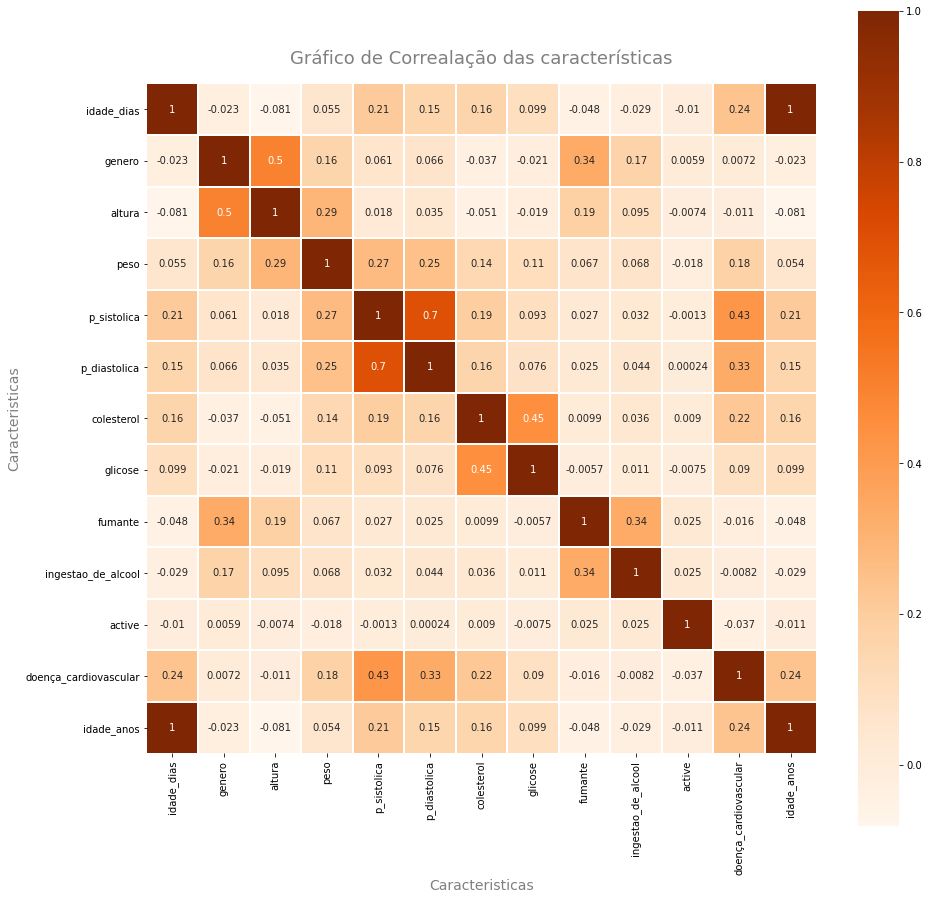

In [ ]:
correlacao = dados.corr() 

plt.figure(figsize=(15,15))
grafico_corr = sns.heatmap(correlacao, cmap="Oranges", annot=True, square=True, linecolor='white', linewidths=.6) 
grafico_corr.set_xlabel("Caracteristicas", color = 'grey', fontdict= {'fontsize': 14})
grafico_corr.set_ylabel("Caracteristicas", color = 'grey', fontdict= {'fontsize': 14})
plt.title("Gráfico de Correalação das características", fontdict= {'fontsize': 18}, pad = 20, color = 'grey')

    É possivel ver uma forte correlação da p_sistolica, p_diastolica, colesterol, idade e peso em relação as doenças cardiovasculares.

# Machine Learning:

In [ ]:
x = dados[["p_sistolica", "p_diastolica", "colesterol", "idade_anos", "peso"]]
y = dados["doença_cardiovascular"]

## DecisionTreeClassifier

In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=5) #max_depth profundidade da arvore
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 48146 elementos e testaremos com 20635 elementos
A acurácia foi 73.22%


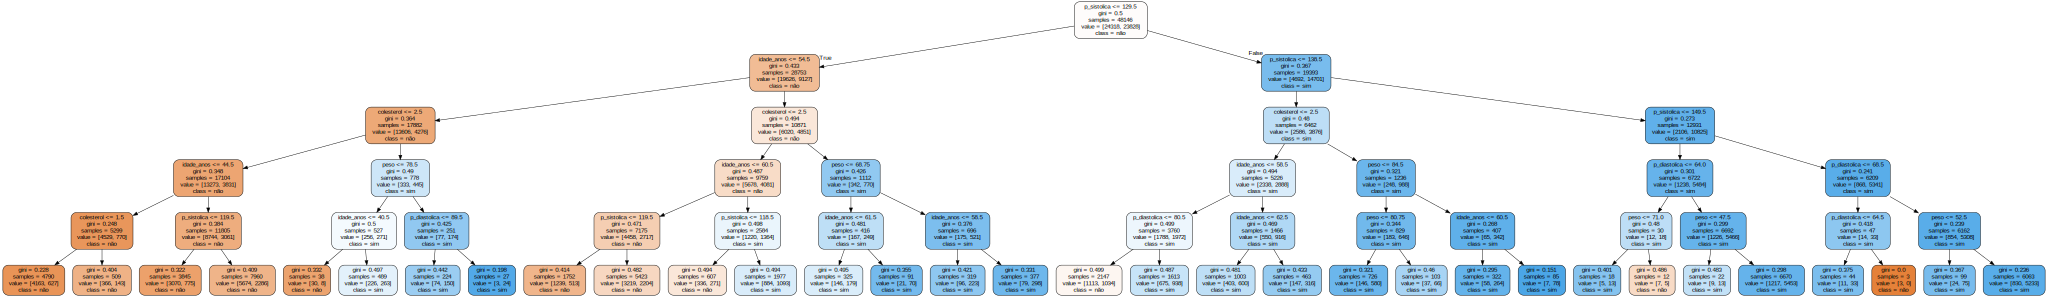

In [ ]:
features = x.columns
dot_data = export_graphviz(modelo, feature_names = features, filled = True, rounded = True, class_names = ["não", "sim"], )
grafico = graphviz.Source(dot_data)
grafico

## DummyClassifier

In [ ]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 50.14%


## LinearSVC

In [ ]:
modelo_linearSVC = LinearSVC(max_iter = 1000)
modelo_linearSVC.fit(treino_x, treino_y)
previsoes_SVC = modelo_linearSVC.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes_SVC) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 72.25%


## CrossValidation

In [ ]:
accuracies_DecisionTreeClassifier = cross_val_score(estimator=DecisionTreeClassifier(max_depth=2), X=treino_x, y=treino_y, cv=10)
accuracies_DummyClassifier = cross_val_score(estimator=DummyClassifier(), X=treino_x, y=treino_y, cv=10)
accuracies_linearSVC = cross_val_score(estimator=LinearSVC(), X=treino_x, y=treino_y, cv=10)

In [ ]:
print("Decision Tree Classifier Acuracia: ", accuracies_DecisionTreeClassifier.mean().round(2))
print("Decision Tree Classifier Desvio: ", accuracies_DecisionTreeClassifier.std().round(2))
print("Dummy Classifier Acuracia: ", accuracies_DummyClassifier.mean().round(2))
print("Dummy Classifier Desvio: ", accuracies_DummyClassifier.std().round(2))
print("linear SVC Acuracia: ", accuracies_linearSVC.mean().round(2))
print("linear SVC Desvio: ", accuracies_linearSVC.std().round(2))

Decision Tree Classifier Acuracia:  0.71
Decision Tree Classifier Desvio:  0.0
Dummy Classifier Acuracia:  0.5
Dummy Classifier Desvio:  0.01
linear SVC Acuracia:  0.72
linear SVC Desvio:  0.0


# Exportando

In [ ]:
output = open('modelo_cardio', 'wb')
pickle.dump(modelo, output)
output.close()

# Simulador


In [ ]:
modelo = open('/content/modelo_cardio','rb')
lm_new = pickle.load(modelo)
modelo.close()

In [ ]:
p_sistolica = 120
p_diastolica = 80
colesterol = 1      # 1: normal, 2: acima do normal, 3: muito acima do normal
idade_anos = 23
peso = 60           # em kg

entrada=[[p_sistolica, p_diastolica, colesterol, idade_anos, peso]]

if (lm_new.predict(entrada) == 0):
  print("Não terá Doenças Cardiovasculares")
else:
  print("Terá Doenças Cardiovasculares")

Não terá Doenças Cardiovasculares
